<a href="https://colab.research.google.com/github/IPablo271/Computer-Vision/blob/main/prueba2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import cv2
import matplotlib.pyplot as plt
from skimage import io, measure, morphology
import numpy as np

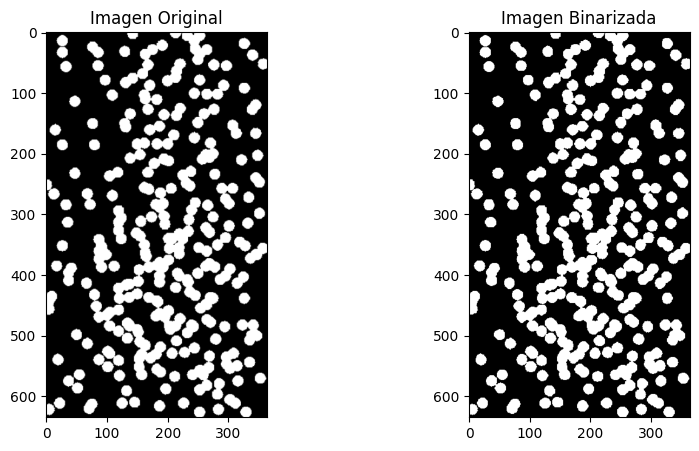

In [2]:
# Cargar la imagen
imagen = cv2.imread('microscope.png', cv2.IMREAD_GRAYSCALE)

# Binarizar la imagen usando el método de Otsu
_, binarizada = cv2.threshold(imagen, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(binarizada, cmap='gray')
plt.title('Imagen Binarizada')

plt.show()

In [3]:
labeled_image = measure.label(binarizada)

# Obtener propiedades de las regiones etiquetadas
regions = measure.regionprops(labeled_image)

# Encontrar la región de menor tamaño
smallest_region = min(regions, key=lambda x: x.area)

# Obtener el tamaño de la región de menor tamaño
smallest_region_size = smallest_region.area

print("El tamaño de la componente conexa de menor tamaño es:", smallest_region_size, "píxeles.")

El tamaño de la componente conexa de menor tamaño es: 158 píxeles.


In [5]:
largest_region = max(regions, key=lambda x: x.area)
print("El tamaño de la componente conexa de mayor tamaño es:", largest_region.area, "píxeles.")

# Crear una imagen binaria con solo la región de mayor tamaño
binary_image = np.where(labeled_image == largest_region.label, 1, 0)

# Guardar la imagen binaria resultante
io.imsave('largest_component.png', binary_image.astype(np.uint8))

# Contar el número de células
num_cells = len(regions)

print("Número total de células en la imagen:", num_cells)

El tamaño de la componente conexa de mayor tamaño es: 4179 píxeles.
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Número total de células en la imagen: 125


<ipython-input-5-bff6abe1e83c>:8: UserWarning: largest_component.png is a low contrast image
  io.imsave('largest_component.png', binary_image.astype(np.uint8))


In [8]:
labeled_image = measure.label(binarizada)

# Obtener propiedades de las regiones etiquetadas
regions = measure.regionprops(labeled_image)

# Encontrar la región de mayor tamaño
largest_region = max(regions, key=lambda x: x.area)
print("El tamaño de la componente conexa de mayor tamaño es:", largest_region.area, "píxeles.")

# Obtener la etiqueta de la región de mayor tamaño
largest_label = largest_region.label

# Crear una imagen binaria con solo la región de mayor tamaño
binary_image = labeled_image == largest_label

# Guardar la imagen binaria resultante
io.imsave('largest_component.png', binary_image.astype(np.uint8) * 255)
# Contar el número de células
num_cells = len(regions)

print("Número total de células en la imagen:", num_cells)

El tamaño de la componente conexa de mayor tamaño es: 4179 píxeles.
Número total de células en la imagen: 125


In [10]:
binarizada = morphology.binary_closing(binarizada, morphology.disk(3))
binarizada = morphology.binary_opening(binarizada, morphology.disk(3))

labeled_image = measure.label(binarizada)

# Obtener propiedades de las regiones etiquetadas
regions = measure.regionprops(labeled_image)

# Contar el número de células
num_cells_detected = len(regions)

print("Número total de células detectadas en la imagen:", num_cells_detected)

Número total de células detectadas en la imagen: 82
